In [3]:
# install in terminal
# xcode-select --install

# in jupyter notebook
# pip install lxml
# pip install yfinance

# restart kernel

# We first import the necessary libraries.

- yfinance is used to download the historical market data from Yahoo finance.
- matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python.
- ARIMA is a common model used for predicting future points in a series.

In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 573.5 kB/s eta 0:00:000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# We use yfinance's download function to fetch the historical market data.

- For this example, we are considering stock data for Apple ('AAPL') and Tesla ('TSLA') from the start of 2019 to the start of 2023.
- Each of the dataframes 'data_apple' and 'data_tesla' has several columns such as Open, High, Low, Close, Adj Close, Volume.
- Since we are interested only in the closing prices, we'll select the 'Close' column.

In [6]:
# Download historical data as dataframe
data_apple = yf.download('AAPL', start='2019-01-01', end='2023-07-21')
data_tesla = yf.download('TSLA', start='2019-01-01', end='2023-07-21')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
# data_apple.head()

In [8]:
# data_tesla.head()

In [9]:
# data_apple.info()

In [10]:
# data_apple.describe()

In [11]:
# data_tesla.info()

In [12]:
# data_tesla.describe()

# Let's visualize the closing prices of both stocks with time to see how they've changed.
- We're using matplotlib's pyplot for this.

In [13]:
# We'll use only the closing prices
closing_prices_apple = data_apple['Close']
closing_prices_tesla = data_tesla['Close']

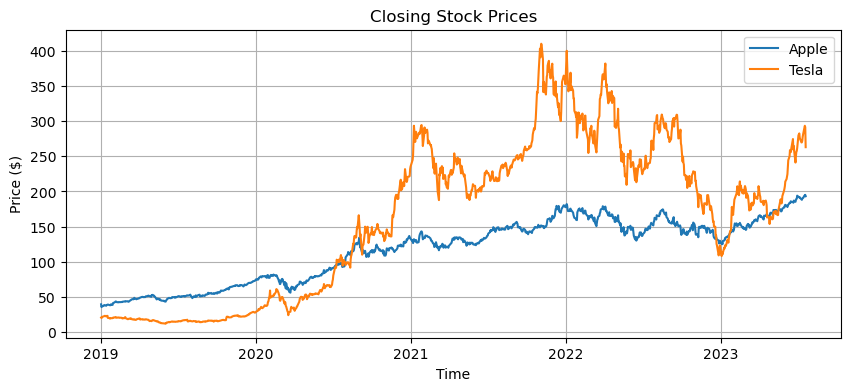

In [14]:
# Visualize the closing prices
plt.figure(figsize=(10,4))
plt.plot(closing_prices_apple, label='Apple')
plt.plot(closing_prices_tesla, label='Tesla')
plt.title('Closing Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Now, let's use the ARIMA model to forecast the stock prices.
- We create an instance of the ARIMA model for both Apple's and Tesla's stock prices.
- It's important to note that the choice of parameters (5,1,0) for the ARIMA model is a simplification. In reality, one should use statistical tests and plots (like the Autocorrelation function) to guide the choice of these parameters.

ARIMA Model ARIMA (AutoRegressive Integrated Moving Average) is a popular model used in time series analysis to understand the data and predict the future points in the series.

In the ARIMA model:

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Let's use ARIMA model to forecast Apple's stock prices. For simplicity, we are using the parameters (5,1,0) for the ARIMA model.

In [15]:
# Fit the ARIMA model for Apple's stock
model_apple = ARIMA(closing_prices_apple, order=(5,1,0))
model_fit_apple = model_apple.fit()

# Fit the ARIMA model for Tesla's stock
model_tesla = ARIMA(closing_prices_tesla, order=(5,1,0))
model_fit_tesla = model_tesla.fit()

/Users/Amanda/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Amanda/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Amanda/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Amanda/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

# Once the model has been fit, we can use it to make predictions.

In [16]:
# Make predictions for Apple's stock
predictions_apple = model_fit_apple.predict(typ='levels')

# Make predictions for Tesla's stock
predictions_tesla = model_fit_tesla.predict(typ='levels')

# We now compare the original closing prices with the predicted ones for both stocks.

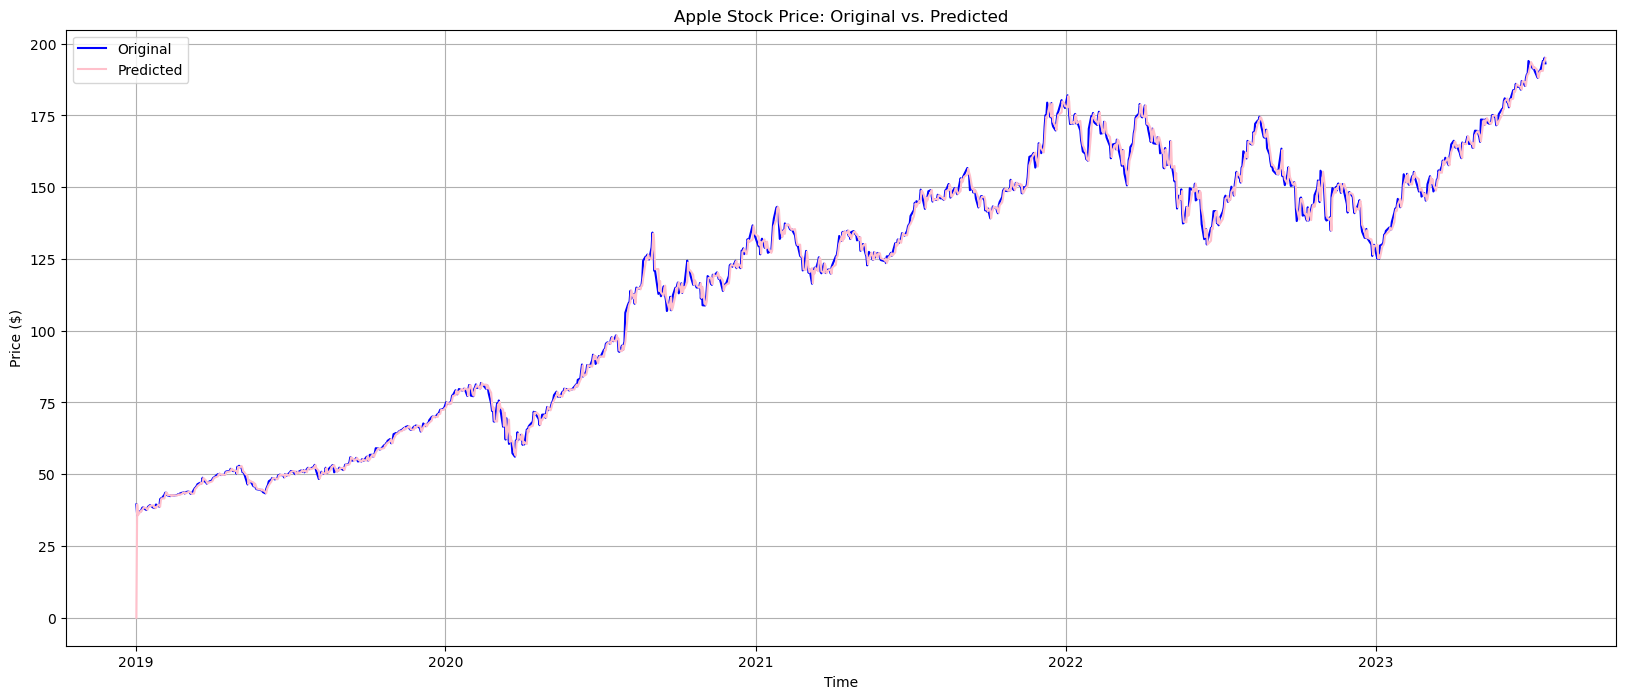

In [17]:
# Plot the original and predicted closing prices for Apple
plt.figure(figsize=(20,8))
plt.plot(closing_prices_apple, color='blue', label='Original')
plt.plot(predictions_apple, color='pink', label='Predicted')
plt.title('Apple Stock Price: Original vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

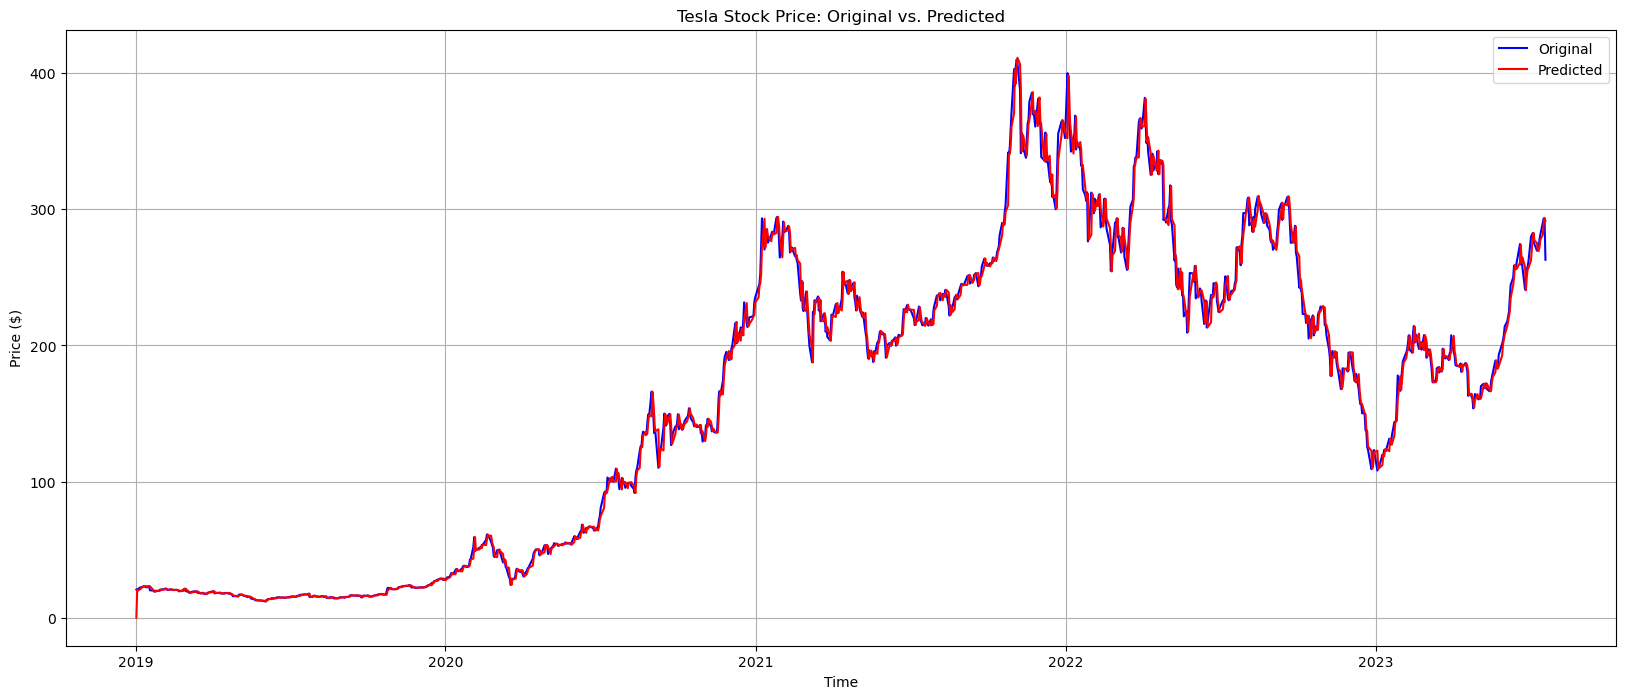

In [18]:
# Plot the original and predicted closing prices for Tesla
plt.figure(figsize=(20,8))
plt.plot(closing_prices_tesla, color='blue', label='Original')
plt.plot(predictions_tesla, color='red', label='Predicted')
plt.title('Tesla Stock Price: Original vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

#Error Percentage

- We can calculate the mean absolute percentage error (MAPE) which gives the mean of absolute percent errors for each prediction.
- This can be used to understand the level of error in the model.

MAPE = (1/n) * Σ(|actual - prediction| / |actual|) * 100%

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_apple = mean_absolute_percentage_error(closing_prices_apple, predictions_apple)
mape_tesla = mean_absolute_percentage_error(closing_prices_tesla, predictions_tesla)

In [20]:
print(f"MAPE for Apple: {mape_apple:.2f}%")
print(f"MAPE for Tesla: {mape_tesla:.2f}%")

MAPE for Apple: 1.56%
MAPE for Tesla: 3.03%


The MAPE or Mean Absolute Percentage Error is a measure used to determine the accuracy of a predictive model. It is the average of the absolute difference between the actual and predicted values, expressed as a percentage of the actual values. The MAPE value indicates the average error percentage of the predictions. A lower MAPE is typically desirable as it represents a smaller average percentage error.

In your case, a mape_apple of 1.56% means that the average prediction error of the ARIMA model for Apple's stock price is around 1.56%. This means that, on average, the model's forecasts deviate by about 1.56% from the actual closing prices.

# Future Values

- We can use the get_forecast() method to predict future values. Here, we'll predict the next 10 days.
- get_forecast() returns an object that contains prediction and info about the confidence intervals. We can use .predicted_mean to get just the predictions.

In [21]:
forecast_apple = model_fit_apple.get_forecast(steps=10).predicted_mean
forecast_tesla = model_fit_tesla.get_forecast(steps=10).predicted_mean

print("Apple forecast:\n", forecast_apple)
print("\nTesla forecast:\n", forecast_tesla)

Apple forecast:
 1145    193.179350
1146    193.352424
1147    193.362239
1148    193.434835
1149    193.339618
1150    193.342986
1151    193.351515
1152    193.352866
1153    193.356576
1154    193.351921
Name: predicted_mean, dtype: float64

Tesla forecast:
 1145    264.178535
1146    263.695283
1147    263.406367
1148    262.073335
1149    262.607445
1150    262.524987
1151    262.520897
1152    262.462933
1153    262.510640
1154    262.495973
Name: predicted_mean, dtype: float64


/Users/Amanda/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Improving the Model

- Model's performance can often be improved by tuning its parameters. In this case, the order of the ARIMA model (p, d, q) could be tuned.
- More sophisticated models could also be used. For example, the SARIMA model also takes seasonality into account.
- Additional features could be added to the model. For example, if we were predicting the stock price of a single company, we could use the company's earnings reports as an additional feature.

# In conclusion, while this notebook provides a simple introduction to time series forecasting with ARIMA, much more could be done to improve the model's performance.